# Gráficas exportadas: método del codo y dispersión

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# interactivo, exportable:
#%matplotlib notebook
# más rápido:
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

dataframes = (pd.read_csv("../data5/dataset_for_clustering.{}.txt".format(day)) for day in ['19may','20may','21may','22may','23may','24may','25may'])
grouped_data = pd.concat(dataframes)
grouped_data.head()

,src_ip,dst_ip,proto,src_port,dst_port,anom_level,threat_level,max_prio,count_events,avg_duration,stdev_duration,night_sessions,work_sessions,afterwork_sessions
0,125.97.1.50,4,0,5,2,0.10,0.0,4,10,54.00,37.69,0,5,0
1,10.181.17.105,6,0,18,2,0.01,0.0,4,38,5.44,1.42,0,18,0
2,172.28.8.10,7,0,8,2,0.03,0.0,4,20,46.75,51.87,0,8,0
3,172.24.108.65,3,0,7,1,0.00,0.0,5,135,29.86,49.94,0,7,0
4,172.28.0.143,22,0,141,2,0.05,0.0,4,283,17.04,27.25,0,141,0


## K-Means

(https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c)

In [3]:
#%%time

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

all_x_vars = grouped_data.iloc[:, ~grouped_data.columns.isin(['src_ip'])].values
X = StandardScaler().fit_transform(all_x_vars)

km = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

#algo = KMeans(n_clusters = k) #,init='k-means++', n_init = 10 ,max_iter=300, 
##                        tol=0.0001,  random_state= 111  , algorithm='elkan')

#clusters = algo.fit_predict(x_vars[i])
#labels = algo.labels_
#centroids = algo.cluster_centers_

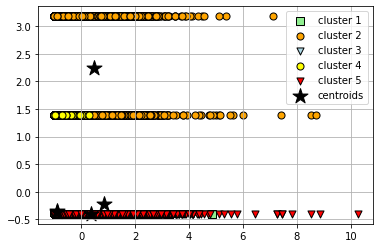

In [4]:
# plot the 5 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    X[y_km == 3, 0], X[y_km == 3, 1],
    s=50, c='yellow',
    marker='o', edgecolor='black',
    label='cluster 4'
)

plt.scatter(
    X[y_km == 4, 0], X[y_km == 4, 1],
    s=50, c='red',
    marker='v', edgecolor='black',
    label='cluster 5'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='black', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()